In [193]:
import numpy as np
#importacion pandas
import pandas as pd
from sklearn import datasets
#Importacion de módulo para dividir el dataset
from sklearn.model_selection import train_test_split
#Normalización de los datos
from sklearn.preprocessing import MinMaxScaler, RobustScaler
#Importación de la regresión logistica
from sklearn.linear_model import LogisticRegression
#Importación de matriz de confusión
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, f1_score,precision_score,recall_score
#Importación grafica de matriz de confusión
import seaborn as sns
#nuevas importaciones
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

Cargar el dataset

In [194]:
dataset=pd.read_csv('/HCV-Egy-Data.csv')
dataset.info() # información

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1385 non-null   int64  
 1   Gender                            1385 non-null   int64  
 2   BMI                               1385 non-null   int64  
 3   Fever                             1385 non-null   int64  
 4   Nausea/Vomting                    1385 non-null   int64  
 5   Headache                          1385 non-null   int64  
 6   Diarrhea                          1385 non-null   int64  
 7   Fatigue & generalized bone ache   1385 non-null   int64  
 8   Jaundice                          1385 non-null   int64  
 9   Epigastric pain                   1385 non-null   int64  
 10  WBC                               1385 non-null   int64  
 11  RBC                               1385 non-null   float64
 12  HGB   

Cargar los parámetros de entrada

In [195]:
# Separar el dataset en características (X) y etiquetas (y) para predecir el estado de fibrosis hepática
X = dataset.drop('Baselinehistological staging', axis=1)
y = dataset['Baselinehistological staging']


Partir el dataset para entrenamiento y pruebas (80 % entrenamiento

---

y 20%  prueba)

In [196]:
XTrain,XTest,yTrain,yTest=train_test_split(X,y,test_size=0.2, random_state=42)
print("XTRain=",XTrain.shape)
print("XTest=",XTest.shape)

XTRain= (1108, 28)
XTest= (277, 28)


Normalización con Robust Scaler

In [197]:
# Crear una instancia del escalador RobustScaler
escalar = RobustScaler()

# Ajustar y transformar en el conjunto de entrenamiento
XTrain = escalar.fit_transform(XTrain)

# Transformar en el conjunto de prueba
XTest = escalar.transform(XTest)

print(XTrain)
print(XTest)

[[-0.8         1.          0.85714286 ...  0.25388343 -0.3263119
   0.57142857]
 [ 0.66666667  1.         -0.71428571 ...  0.06170276  0.03273763
  -0.71428571]
 [ 0.53333333  0.          0.14285714 ...  0.2511809   0.49603644
  -0.71428571]
 ...
 [-0.33333333  0.         -0.14285714 ... -0.49088769 -0.44989066
  -0.14285714]
 [ 0.33333333  1.         -0.14285714 ... -0.49088769 -0.44989066
   0.57142857]
 [ 0.26666667  0.          0.85714286 ...  0.11835521  0.50896482
  -0.57142857]]
[[ 0.33333333  0.         -0.85714286 ... -0.49088769 -0.44989066
   0.28571429]
 [ 0.26666667  0.          0.14285714 ... -0.49088769 -0.44989066
  -0.71428571]
 [-0.53333333  1.          0.         ...  0.85656526 -0.3999588
  -0.28571429]
 ...
 [-0.26666667  0.         -0.71428571 ... -0.49088769 -0.44989066
   0.71428571]
 [-0.06666667  0.          0.42857143 ... -0.49088769 -0.44989066
  -1.        ]
 [-0.4         0.          0.42857143 ...  0.34242873  0.53965629
   0.71428571]]


Implementación de la regresión logística

In [198]:
modelo = LogisticRegression(multi_class='multinomial', solver='lbfgs')
modelo.fit(XTrain,yTrain)



LogisticRegression(multi_class='multinomial')

Valor de las constantes

In [199]:
print("Intercepto =",modelo.intercept_ )
print("Coeficientes =",modelo.coef_ )

Intercepto = [ 0.39327019 -0.0322269  -0.14635721 -0.21468607]
Coeficientes = [[ 0.03432169  0.00587717 -0.055174    0.05418407 -0.1994913  -0.06793475
   0.08309395 -0.1243103  -0.07586131  0.21066819 -0.01999451 -0.0010307
   0.04463839 -0.03297537  0.05325331 -0.10857949 -0.04195316 -0.0073814
   0.05895917  0.04782289 -0.0122074  -0.05746442  0.02100411  0.00241537
  -0.09936258  0.0945197  -0.02329693  0.12081137]
 [ 0.12135871 -0.13260033  0.219924    0.02077614 -0.07361111  0.00879936
   0.03282676  0.15814439  0.14100181  0.07317288 -0.02248714  0.06123164
  -0.03464032  0.07425919  0.06034708 -0.01040132  0.02625728 -0.04346166
   0.00221665 -0.06127454  0.08035246 -0.04915372 -0.12239505  0.03024656
  -0.01736659  0.15967099 -0.2691995   0.07227099]
 [ 0.00659543  0.21216763 -0.0287246   0.05578888  0.19145448 -0.01498306
  -0.04495461 -0.0652322  -0.07197648 -0.12478188 -0.05489025 -0.07754799
  -0.0186689   0.02937344  0.03929062 -0.00892498  0.09431178  0.00483869
  -0.073

Predicciones

In [200]:
yPredicho=modelo.predict(XTest)
print(yPredicho)

[3 4 3 2 1 4 3 1 3 3 4 4 4 4 4 2 3 3 4 1 3 4 4 3 4 3 1 1 4 2 2 2 3 2 2 4 4
 3 4 4 4 1 3 1 1 2 1 3 2 3 3 4 3 2 1 1 4 2 3 4 3 3 1 2 1 1 3 3 2 4 1 3 4 3
 3 4 1 1 4 4 2 1 2 1 3 2 3 1 1 2 2 1 4 2 2 4 4 2 2 4 2 4 4 3 2 2 4 4 3 1 4
 1 4 2 3 4 3 4 3 2 3 3 2 4 1 2 2 1 1 4 3 3 2 3 3 3 2 2 2 4 4 4 1 4 4 3 4 4
 4 4 4 4 2 1 1 2 3 2 4 4 3 3 4 4 1 4 4 1 4 3 2 2 1 3 3 4 1 4 3 1 4 3 4 1 2
 2 1 1 2 4 2 3 4 2 3 3 2 1 2 4 4 2 4 2 2 4 2 2 4 3 4 4 4 2 3 4 2 1 4 2 4 4
 3 2 4 4 4 3 2 4 1 4 3 1 3 3 3 4 4 1 4 1 4 3 3 4 4 3 4 3 4 2 1 2 3 1 2 4 4
 3 2 4 4 4 3 3 4 2 2 2 3 3 1 1 1 2 3]


Análisis del modelo mediante la matriz de confusión

[[10 14 17 25]
 [ 5 27 18 23]
 [16 12 18 18]
 [18 11 17 28]]


<Axes: >

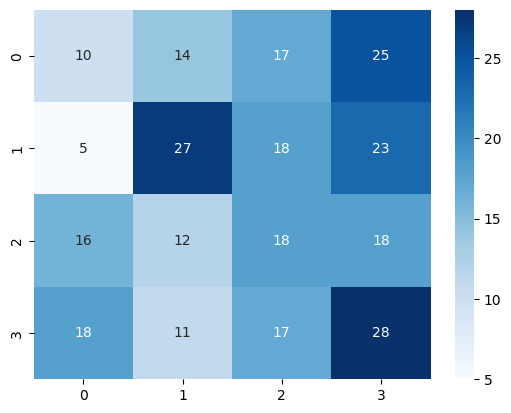

In [201]:
matriz=confusion_matrix(yTest,yPredicho)
print(matriz)
sns.heatmap(matriz,annot=True,cmap="Blues")

Accuracy

In [202]:
# Calcular la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(yTest, yPredicho)
print("Exactitud (Accuracy):", accuracy)


Exactitud (Accuracy): 0.2996389891696751


F1_score

In [203]:
# Calcular la puntuación F-measure (ponderada)
f1 = f1_score(yTest, modelo.predict(XTest), average='weighted')
print("Puntaje F1 ponderado:", f1)


Puntaje F1 ponderado: 0.29643566792316023


AUROC

In [204]:
# Calcular el Área bajo la curva ROC (AUROC)
roc_auc = roc_auc_score(yTest, modelo.predict_proba(XTest), multi_class='ovr')
print("AUROC:", roc_auc)

AUROC: 0.5579642946888275


G-Mean

In [205]:
# Calcular la G-mean
precision = precision_score(yTest, yPredicho, average='weighted')
recall = recall_score(yTest, yPredicho, average='weighted')
g_mean = np.sqrt(precision * recall)
print("G-mean:", g_mean)

G-mean: 0.29921623390780583


Calcular Sensibilidad

In [206]:
# Inicializar una lista para almacenar las sensibilidades por clase
sensitivities = []

# Calcular la sensibilidad para cada clase
for i in range(4):
    true_positives = matriz[i, i]
    actual_positives = sum(matriz[i, :])
    sensitivity = true_positives / actual_positives
    sensitivities.append(sensitivity)
    print(f"Sensibilidad (clase {i}): {sensitivity}")

# Calcular el promedio de sensibilidades
average_sensitivity = sum(sensitivities) / len(sensitivities)
print("Sensibilidad promedio:", average_sensitivity)

Sensibilidad (clase 0): 0.15151515151515152
Sensibilidad (clase 1): 0.3698630136986301
Sensibilidad (clase 2): 0.28125
Sensibilidad (clase 3): 0.3783783783783784
Sensibilidad promedio: 0.29525163589804004


Calcular la Especificidad

In [207]:
# Inicializar una lista para almacenar las especificidades por clase
specificities = []

# Calcular la especificidad para cada clase
for i in range(4):
    true_negatives = sum([matriz[j, j] for j in range(4)]) - matriz[i, i]
    actual_negatives = len(yTest) - sum(matriz[i, :])
    specificity = true_negatives / actual_negatives
    specificities.append(specificity)
    print(f"Especificidad (clase {i}): {specificity}")

# Calcular el promedio de especificidades
average_specificity = sum(specificities) / len(specificities)
print("Especificidad promedio:", average_specificity)

Especificidad (clase 0): 0.3459715639810427
Especificidad (clase 1): 0.27450980392156865
Especificidad (clase 2): 0.3051643192488263
Especificidad (clase 3): 0.270935960591133
Especificidad promedio: 0.29914541193564265


Error tipo 1 2

In [208]:
# Inicializar listas para almacenar los errores de Tipo 1 y Tipo 2 por clase
type1_errors = []
type2_errors = []

# Calcular los errores de Tipo 1 y Tipo 2 para cada clase
for i in range(4):
    false_positives = sum(matriz[:, i]) - matriz[i, i]
    false_negatives = sum(matriz[i, :]) - matriz[i, i]
    type1_error = false_positives / actual_negatives
    type2_error = false_negatives / actual_positives
    type1_errors.append(type1_error)
    type2_errors.append(type2_error)
    print(f"Error de Tipo 1 (clase {i}): {type1_error}")
    print(f"Error de Tipo 2 (clase {i}): {type2_error}")

# Calcular el promedio de errores de Tipo 1 y Tipo 2
average_type1_error = sum(type1_errors) / len(type1_errors)
average_type2_error = sum(type2_errors) / len(type2_errors)
print("Error de Tipo 1 promedio:", average_type1_error)
print("Error de Tipo 2 promedio:", average_type2_error)

Error de Tipo 1 (clase 0): 0.1921182266009852
Error de Tipo 2 (clase 0): 0.7567567567567568
Error de Tipo 1 (clase 1): 0.18226600985221675
Error de Tipo 2 (clase 1): 0.6216216216216216
Error de Tipo 1 (clase 2): 0.2561576354679803
Error de Tipo 2 (clase 2): 0.6216216216216216
Error de Tipo 1 (clase 3): 0.3251231527093596
Error de Tipo 2 (clase 3): 0.6216216216216216
Error de Tipo 1 promedio: 0.23891625615763545
Error de Tipo 2 promedio: 0.6554054054054054


In [209]:
precision_recall_fscore_support(yTest,yPredicho,average=None)
etiquetas=["fibrosis portal","pocos septos", "muchos septos", "cirrosis "]
print(classification_report(yTest,yPredicho,target_names=etiquetas))

                 precision    recall  f1-score   support

fibrosis portal       0.20      0.15      0.17        66
   pocos septos       0.42      0.37      0.39        73
  muchos septos       0.26      0.28      0.27        64
      cirrosis        0.30      0.38      0.33        74

       accuracy                           0.30       277
      macro avg       0.30      0.30      0.29       277
   weighted avg       0.30      0.30      0.30       277

